# Fig 2: global and regional volume comparison

Code & data attached to the manuscript. If using the data for something else, please refer to the original sources.

In [1]:
import pandas as pd
import numpy as np

## Read in the various estimates

In [2]:
# Match regional agg choices Millan 2022
def reformat_df(df):
    df.loc['01, 02'] = df.loc[['01', '02']].sum()
    df.loc['13, 14, 15'] = df.loc[['13', '14', '15']].sum()
    return df.drop(['01', '02'] + ['13', '14', '15']).sort_index()

In [3]:
# Output
gdf = pd.DataFrame()

s = 'mb96'
gdf.loc['Global', f'{s}_V'] = 180000
gdf.loc['Global', f'{s}_V_err'] = 40000
gdf.loc['Global', f'{s}_SLE'] = 0.5
gdf.loc['Global', f'{s}_SLE_err'] = 0.1

s = 'o04'
gdf.loc['excl. A. & G.', f'{s}_V'] = 56000
gdf.loc['excl. A. & G.', f'{s}_V_err'] = np.NaN
gdf.loc['excl. A. & G.', f'{s}_SLE'] = 0.15
gdf.loc['excl. A. & G.', f'{s}_SLE_err'] = np.NaN

s = 'dm05'
gdf.loc['Global', f'{s}_V'] = 260000
gdf.loc['Global', f'{s}_V_err'] = 65000
gdf.loc['Global', f'{s}_SLE'] = 0.65
gdf.loc['Global', f'{s}_SLE_err'] = 0.16
gdf.loc['excl. A. & G.', f'{s}_V'] = 133000
gdf.loc['excl. A. & G.', f'{s}_V_err'] = 20000
gdf.loc['excl. A. & G.', f'{s}_SLE'] = 133000 * 0.9 / 326 * 1e-3
gdf.loc['excl. A. & G.', f'{s}_SLE_err'] = 20000 * 0.9 / 326 * 1e-3

s = 'rb05'
gdf.loc['excl. A. & G.', f'{s}_V'] = 87000
gdf.loc['excl. A. & G.', f'{s}_V_err'] = 10000
gdf.loc['excl. A. & G.', f'{s}_SLE'] = 0.241
gdf.loc['excl. A. & G.', f'{s}_SLE_err'] = 0.026

The following estimates have regional tables.

### Radic & Hock 2010

This is pre-RGI and slightly different:

In [4]:
rh10 = pd.read_csv('../data/rh10.csv', index_col=0, header=1)
rh10

,WGI_XF,A,A_err,V,V_err,A.1,A_err.1,V.1,V_err.1,SLE,SLE_err
1.0,Svalbard,36506,364,10260,823,36506,364,10260,823,26.00,2.00
2.0,Scandinavia,3057,18,224,11,3057,18,224,11,0.56,0.03
3.0,Central Europe,3045,17,194,12,3045,17,194,12,0.48,0.03
4.0,Franz Josef Land,13739,141,2248,176,13739,141,2248,176,5.60,0.40
5.0,Novaya Zemlya,23645,1132,9410,3388,23645,1132,9410,3388,23.00,8.00
6.0,Severnaya Zemlya,19397,566,6046,1231,19397,566,6046,1231,15.00,3.00
7.0,Caucasus,1397,10,88,6,1397,10,88,6,0.22,0.01
8.0,North and Eat Asia,2902,14,170,8,2902,14,170,8,0.42,0.02
9.0,High Mountain Ais,107340,229,10877,404,114330,729,12483,462,31.00,1.00
10.0,Alaska,27818,518,10477,1816,79260,1079,27436,3312,68.00,8.00


In [5]:
rh10_total = rh10.iloc[-1:].copy()
rh10_total

,WGI_XF,A,A_err,V,V_err,A.1,A_err.1,V.1,V_err.1,SLE,SLE_err
NaN,Total,317724,1708,69481,4784,741448,68186,241430,29229,600.0,73.0


In [6]:
rh10 = rh10.iloc[:-1].copy().drop('WGI_XF', axis=1)
rh10.index = [f'{int(c):02d}' for c in rh10.index]
rh10.sum().to_frame().T

,A,A_err,V,V_err,A.1,A_err.1,V.1,V_err.1,SLE,SLE_err
0,317725.0,4614.0,69482.0,11514.0,741449.0,79721.0,241429.0,53811.0,598.95,132.61


In [7]:
((rh10**2).sum()**0.5).loc[['A_err.1', 'V_err.1', 'SLE_err']].to_frame().T

,A_err.1,V_err.1,SLE_err
0,68185.6067,29228.473806,72.30485


Table is consistent.

**Volume without 05 and 19**:

In [8]:
rh10_no = rh10.drop(['17', '18', '19'])
rh10_no_s = rh10_no.sum().to_frame().T
rh10_no_s

,A,A_err,V,V_err,A.1,A_err.1,V.1,V_err.1,SLE,SLE_err
0,298426.0,4408.0,66855.0,11287.0,514309.0,7192.0,164043.0,24945.0,407.05,61.51


In [9]:
err = ((rh10_no**2).sum()**0.5).loc[['A_err.1', 'V_err.1', 'SLE_err']].to_frame().T
err

,A_err.1,V_err.1,SLE_err
0,2429.05743,13349.39905,32.908681


In [10]:
rh10_no['V.1'].values

array([10260,   224,   194,  2248,  9410,  6046,    88,   170, 12483,
       27436,  1892, 80160,  4889,   344,  8116,    83])

In [11]:
s = 'rh10'
gdf.loc['Global', f'{s}_V'] = rh10_total['V.1'].values
gdf.loc['Global', f'{s}_V_err'] = rh10_total['V_err.1'].values
gdf.loc['Global', f'{s}_SLE'] = rh10_total['SLE'].values * 1e-3
gdf.loc['Global', f'{s}_SLE_err'] = rh10_total['SLE_err'].values * 1e-3
gdf.loc['excl. A. & G.', f'{s}_V'] = rh10_no_s['V.1'].values
gdf.loc['excl. A. & G.', f'{s}_V_err'] = err['V_err.1'].values
gdf.loc['excl. A. & G.', f'{s}_SLE'] = rh10_no_s['SLE'].values * 1e-3
gdf.loc['excl. A. & G.', f'{s}_SLE_err'] = err['SLE_err'].values * 1e-3

### Marzeion et al, 2012

In [12]:
m12 = pd.read_csv('../data/m12.csv', index_col=0)

In [13]:
m12[['A', 'A_err']] = m12[['A', 'A_err']] * 1e3

Let's compute the volumes from SLE:

In [14]:
m12['V'] = m12['SLE'] * 362 / 0.9
m12['V_err'] = m12['SLE_err'] * 362 / 0.9

In [15]:
m12_total = m12.iloc[-1:].copy()
m12_total

,A,A_err,V,V_err,SLE,SLE_err
RGI_Reg,,,,,,
Total (without 19),590900.0,1600.0,148983.111111,7521.555556,370.4,18.7


In [16]:
m12 = m12.iloc[:-1].copy()
m12.index = [f'{int(c):02d}' for c in m12.index]
m12.sum().to_frame().T

,A,A_err,V,V_err,SLE,SLE_err
0,590800.0,3800.0,148942.888889,17617.333333,370.3,43.8


In [17]:
((m12**2).sum()**0.5).loc[['A_err', 'V_err', 'SLE_err']].to_frame().T

,A_err,V_err,SLE_err
0,1593.737745,7736.898923,19.235384


OK Table is more or less consistent, **uncertainty estimates computed as uncorrelated.**

**Volume without 05 and 19**:

In [18]:
m12_no5 = m12.drop('05')
m12_no5_s = m12_no5.sum().to_frame().T
m12_no5_s

,A,A_err,V,V_err,SLE,SLE_err
0,504700.0,3700.0,137841.555556,15847.555556,342.7,39.4


In [19]:
err = ((m12_no5**2).sum()**0.5).loc[['A_err', 'V_err', 'SLE_err']].to_frame().T
err

,A_err,V_err,SLE_err
0,1590.597372,7531.765501,18.725384


In [20]:
s = 'm12'
gdf.loc['excl. A. & G.', f'{s}_V'] = m12_no5_s['V'].values
gdf.loc['excl. A. & G.', f'{s}_V_err'] = err['V_err'].values
gdf.loc['excl. A. & G.', f'{s}_SLE'] = m12_no5_s['SLE'].values * 1e-3
gdf.loc['excl. A. & G.', f'{s}_SLE_err'] = err['SLE_err'].values * 1e-3

### Huss & Farinotti 2012

In [21]:
hf12 = pd.read_csv('../data/hf12.csv', index_col=0).drop('Name', axis=1)

In [22]:
hf12

,A,V,V_err,SLE,SLE_err
RGI_Reg,,,,,
1,89901,20402,1501,50.7,3.7
2,14615,1025,84,2.5,0.2
3,105139,34399,4699,85.4,11.7
4,40893,9814,1115,24.4,2.8
5,87765,19042,2655,47.3,6.6
6,11055,4441,370,11.0,0.9
7,33932,9685,922,24.0,2.3
8,2846,256,19,0.6,0.0
9,51665,16839,2205,41.8,5.5


In [23]:
hf12_total = hf12.iloc[[-1]].copy()
hf12_total

,A,V,V_err,SLE,SLE_err
RGI_Reg,,,,,
Total,734856,170214,20688,422.6,57.1


In [24]:
hf12 = hf12.iloc[:-1].copy()
hf12.index = [f'{int(c):02d}' for c in hf12.index]
hf12.sum().to_frame().T

,A,V,V_err,SLE,SLE_err
0,734844.0,170205.0,23440.0,422.6,58.1


OK Table is more or less consistent. The volume is off by 11 and the error estimates aren't exact (using uncorrelated is much worse)

**Volume without 05 and 19**:

In [25]:
hf12_no = hf12.drop(['05', '19'])
hf12_no_s = hf12_no.sum().to_frame().T
hf12_no_s

,A,V,V_err,SLE,SLE_err
0,513906.0,113646.0,12383.0,282.2,30.6


In [26]:
s = 'hf12'
gdf.loc['Global', f'{s}_V'] = hf12_total['V'].values
gdf.loc['Global', f'{s}_V_err'] = hf12_total['V_err'].values
gdf.loc['Global', f'{s}_SLE'] = hf12_total['SLE'].values * 1e-3
gdf.loc['Global', f'{s}_SLE_err'] = hf12_total['SLE_err'].values * 1e-3
gdf.loc['excl. A. & G.', f'{s}_V'] = hf12_no_s['V'].values
gdf.loc['excl. A. & G.', f'{s}_V_err'] = hf12_no_s['V_err'].values
gdf.loc['excl. A. & G.', f'{s}_SLE'] = hf12_no_s['SLE'].values * 1e-3
gdf.loc['excl. A. & G.', f'{s}_SLE_err'] = hf12_no_s['SLE_err'].values * 1e-3

### Grinsted, 2013

In [27]:
g13 = pd.read_csv('../data/g13.csv', index_col=0)

Let's compute the volumes from SLE:

In [28]:
g13['V'] = g13['SLE'] * 362 / 0.9
g13['V_err'] = g13['SLE_err'] * 362 / 0.9

In [29]:
g13_total = g13.iloc[-2:].copy()
g13_total

,A,V,V_err,SLE,SLE_err
RGI_Reg,,,,,
Total,734933,140777.777778,28155.555556,350.0,70.0
Withouth 5+19,513881,92511.111111,NaN,230.0,NaN


In [30]:
g13 = g13.iloc[:-2].copy()
g13.index = [f'{int(c):02d}' for c in g13.index]
g13.sum().to_frame().T

,A,V,V_err,SLE,SLE_err
0,734937.0,142145.333333,0.0,353.4,0.0


OK Table is more or less consistent.

**Volume without 05 and 19**:

In [31]:
g13_no = g13.drop(['05', '19'])
g13_no_s = g13_no.sum().to_frame().T
g13_no_s

,A,V,V_err,SLE,SLE_err
0,513881.0,93034.0,0.0,231.3,0.0


In [32]:
s = 'g13'
gdf.loc['Global', f'{s}_V'] = g13_total.loc['Total', 'V']
gdf.loc['Global', f'{s}_V_err'] = g13_total.loc['Total', 'V_err']
gdf.loc['Global', f'{s}_SLE'] = g13_total.loc['Total', 'SLE'] * 1e-3
gdf.loc['Global', f'{s}_SLE_err'] = g13_total.loc['Total', 'SLE_err'] * 1e-3
gdf.loc['excl. A. & G.', f'{s}_V'] = g13_total.loc['Withouth 5+19', 'V']
gdf.loc['excl. A. & G.', f'{s}_V_err'] = g13_total.loc['Withouth 5+19', 'V_err']
gdf.loc['excl. A. & G.', f'{s}_SLE'] = g13_total.loc['Withouth 5+19', 'SLE'] * 1e-3
gdf.loc['excl. A. & G.', f'{s}_SLE_err'] = g13_total.loc['Withouth 5+19', 'SLE_err'] * 1e-3

### Radic et al., 2014

In [33]:
r14 = pd.read_csv('../data/r14.csv', index_col=0)

In [34]:
r14_total = r14.iloc[[-1]].copy()
r14_total

,A,V,V_err,SLE,SLE_err,V*,SLE*
RGI_Reg,,,,,,,
Total,736989,209973,NaN,522.0,NaN,163277,405.9


In [35]:
r14 = r14.iloc[:-1].copy()
r14.index = [f'{int(c):02d}' for c in r14.index]
r14_s = r14.sum().to_frame().T
r14_s

,A,V,V_err,SLE,SLE_err,V*,SLE*
0,736988.0,209973.0,0.0,522.1,0.0,163276.0,405.9


OK Table is consistent.

**Volume without 05 and 19**:

In [36]:
r14_no = r14.drop(['05', '19'])
r14_no_s = r14_no.sum().to_frame().T
r14_no_s

,A,V,V_err,SLE,SLE_err,V*,SLE*
0,516311.0,144207.0,0.0,358.6,0.0,101052.0,251.2


In [37]:
s = 'r14'
gdf.loc['Global', f'{s}_V'] = r14_total['V'].values
gdf.loc['Global', f'{s}_V_err'] = r14_total['V_err'].values
gdf.loc['Global', f'{s}_SLE'] = r14_total['SLE'].values * 1e-3
gdf.loc['Global', f'{s}_SLE_err'] = r14_total['SLE_err'].values * 1e-3
gdf.loc['excl. A. & G.', f'{s}_V'] = r14_no_s['V'].values
gdf.loc['excl. A. & G.', f'{s}_V_err'] = np.NaN
gdf.loc['excl. A. & G.', f'{s}_SLE'] = r14_no_s['SLE'].values * 1e-3
gdf.loc['excl. A. & G.', f'{s}_SLE_err'] = np.NaN

### Farinotti et al., 2019 

In [38]:
f19 = pd.read_csv('../data/f19.csv', index_col=0)
f19[['V', 'V_err']] = f19[['V', 'V_err']] * 1e3

In [39]:
f19_total = f19.iloc[[-1]].copy()
f19_total

,A,V,V_err,SLE,SLE_err
RGI_Reg,,,,,
Total,705253,158170.0,41030.0,324.3,84.1


In [40]:
f19 = f19.iloc[:-1].copy()
f19.sum().to_frame().T

,A,V,V_err,SLE,SLE_err
0,705245.0,158180.0,41050.0,324.2,84.0


OK Table is consistent.

**Volume without 05 and 19**:

In [41]:
f19_no = f19.drop(['05', '19'])
f19_no_s = f19_no.sum().to_frame().T
f19_no_s

,A,V,V_err,SLE,SLE_err
0,482823.0,96020.0,24920.0,221.2,57.3


In [42]:
s = 'f19'
gdf.loc['Global', f'{s}_V'] = f19_total['V'].values
gdf.loc['Global', f'{s}_V_err'] = f19_total['V_err'].values
gdf.loc['Global', f'{s}_SLE'] = f19_total['SLE'].values * 1e-3
gdf.loc['Global', f'{s}_SLE_err'] = f19_total['SLE_err'].values * 1e-3
gdf.loc['excl. A. & G.', f'{s}_V'] = f19_no_s['V'].values
gdf.loc['excl. A. & G.', f'{s}_V_err'] = f19_no_s['V_err'].values
gdf.loc['excl. A. & G.', f'{s}_SLE'] = f19_no_s['SLE'].values * 1e-3
gdf.loc['excl. A. & G.', f'{s}_SLE_err'] = f19_no_s['SLE_err'].values * 1e-3

### Millan et al., 2022

In [43]:
m22 = pd.read_csv('../data/m22.csv', index_col=0)
m22[['A', 'V', 'V_err']] *= 1e3;

In [44]:
m22_total = m22.iloc[[-1]].copy()
m22_total

,A,V,V_err,SLE,SLE_err
RGI_Reg,,,,,
Total,727000.0,140800.0,40400.0,257.2,85.0


In [45]:
# Also add a dataset with AA "cropped" only
m22_a = m22.iloc[[-2]].copy()
m22_a

,A,V,V_err,SLE,SLE_err
RGI_Reg,,,,,
19*,26000.0,3200.0,830.0,7.27,1.9


In [46]:
m22 = m22.iloc[:-2].copy()
m22_s = m22.sum().to_frame().T
m22_s

,A,V,V_err,SLE,SLE_err
0,726000.0,140900.0,40400.0,311.23,99.4


In [47]:
# Total with other region
m22_ss = (m22.iloc[:-1].sum().to_frame()).T + m22_a.values
m22_ss

,A,V,V_err,SLE,SLE_err
0,619000.0,109000.0,32130.0,257.2,85.3


In [48]:
# Verification
# diff = 35.1 - 3.2
# print(diff * 1e3, 140900 - 109000)

OK Table is more or less consistent, with the **problem of global SLE of course**.

**Volume without 05 and 19**:

In [49]:
m22_no = m22.drop(['05', '19'])
m22_no_s = m22_no.sum().to_frame().T
m22_no_s

,A,V,V_err,SLE,SLE_err
0,503000.0,94000.0,27600.0,223.13,73.9


In [50]:
s = 'm22'
gdf.loc['Global', f'{s}_V'] = m22_total['V'].values
gdf.loc['Global', f'{s}_V_err'] = m22_s['V_err'].values
gdf.loc['Global', f'{s}_SLE'] = m22_s['SLE'].values * 1e-3
gdf.loc['Global', f'{s}_SLE_err'] = m22_s['SLE_err'].values * 1e-3
gdf.loc['excl. A. & G.', f'{s}_V'] = m22_no_s['V'].values
gdf.loc['excl. A. & G.', f'{s}_V_err'] = m22_no_s['V_err'].values
gdf.loc['excl. A. & G.', f'{s}_SLE'] = m22_no_s['SLE'].values * 1e-3
gdf.loc['excl. A. & G.', f'{s}_SLE_err'] = m22_no_s['SLE_err'].values * 1e-3

### Final check and area vs volume plot

In [51]:
# We copy the values from the table to have the authors values 
d = {
    'mb96': [180000, 40000, 680000, 0.5],
    # 'o04': [, ,],
    'dm05': [260000, 65000, 785000, 0.65],
    # 'rb05': [, ,],
    'rh10': [241430, 29229, 741448, 0.6],
    # 'm12': [, ,],
    'hf12': [170214, 20688, 734856, 0.43],
    'g13': [140778, 28155, 734933, 0.35],
    'r14': [209973, 0, 736989, 0.522],
    'f19': [158170, 41030, 705253, 0.324],
    'm22': [140800, 40400, 705253, 0.311],
    'm22*': [109000, 32130, 705253-106701, 0.257],
}
df_v = pd.DataFrame(d, index=['V', 'V_err', 'A', 'SLE']).T
df_v

,V,V_err,A,SLE
mb96,180000.0,40000.0,680000.0,0.500
dm05,260000.0,65000.0,785000.0,0.650
rh10,241430.0,29229.0,741448.0,0.600
hf12,170214.0,20688.0,734856.0,0.430
g13,140778.0,28155.0,734933.0,0.350
r14,209973.0,0.0,736989.0,0.522
f19,158170.0,41030.0,705253.0,0.324
m22,140800.0,40400.0,705253.0,0.311
m22*,109000.0,32130.0,598552.0,0.257


In [52]:
for k in df_v.index:
    if k == 'm22*':
        continue
    p = df_v.loc[k, 'V']
    m = gdf.loc['Global', k +'_V']
    if not np.allclose(p, m):
        print(k, 'V', p, m)
    p = df_v.loc[k, 'V_err']
    m = gdf.loc['Global', k +'_V_err']
    if not np.allclose(p, m):
        print(k, 'V_err', p, m)

g13 V_err 28155.0 28155.555555555555
r14 V_err 0.0 nan


## Plot 

In [53]:
import seaborn as sns
import random

import matplotlib.pyplot as plt
from matplotlib.offsetbox import TextArea, VPacker, AnnotationBbox  # for the text box
from matplotlib.gridspec import GridSpec  # for plot layout

In [54]:
# Separate vol and SLE
x = np.array([1, 2])
gdf.index = x
gdf_vol = gdf[[c for c in gdf if 'V' in c]].copy()
gdf_sle = gdf[[c for c in gdf if 'SLE' in c]].copy()

In [55]:
dataframes = {
    'm12': reformat_df(m12),
    'hf12': reformat_df(hf12),
    'g13': reformat_df(g13),
    'r14': reformat_df(r14),
    'f19': reformat_df(f19),
    'm22': m22,
}

In [56]:
legend = {
    'mb96': 'Meier and Bahr, 1996',
    'o04': 'Ohmura, 2004',
    'dm05': 'Dyurgerov and Meier, 2005',
    'rb05': 'Raper and Braithwaite 2005',
    'rh10': 'Radić and Hock, 2010',
    'm12': 'Marzeion and others, 2012',
    'hf12': 'Huss and Farinotti, 2012',
    'g13': 'Grinsted, 2013',
    'r14': 'Radić and others, 2014',
    'f19': 'Farinotti and others, 2019',
    'm22': 'Millan and others, 2022',
}

In [57]:
# Axis labels for region plot, in order by RGI area
rgi_ids = reformat_df(f19).sort_values('A').index[::-1]

names = [
    'Antarctic\nPeriphery',
    'Arctic Canada\nNorth',
    'Alaska, Western\nCanada & USA',
    'High Mountain\nAsia',
    'Greenland\nperiphery',
    'Russian\nArctic',
    'Arctic Canada\nSouth',
    'Svalbard &\nJan Mayen',
    'Southern\nAndes',
    'Iceland',
    'Scandinavia',
    'Asia North',
    'Low Latitudes',
    'Central Europe',
    'Caucasus &\nMiddle East',
    'New Zealand'
]

strs = []
for i, n in zip(rgi_ids, names):
    # strs.append(n + f' ({i})')
    strs.append(n)

In [58]:
# Whixh data are available for the global plot
estimates = [c.split('_')[0] for c in gdf_vol if 'err' not in c]
sle_valid_keys_global = gdf_sle[[f'{e}_SLE' for e in estimates]].iloc[[0]].dropna(axis=1).columns
sle_valid_keys_no = gdf_sle[[f'{e}_SLE' for e in estimates]].iloc[[1]].dropna(axis=1).columns
v_valid_keys_global = gdf_vol[[f'{e}_V' for e in estimates]].iloc[[0]].dropna(axis=1).columns
v_valid_keys_no = gdf_vol[[f'{e}_V' for e in estimates]].iloc[[1]].dropna(axis=1).columns

In [59]:
# Make plot pretty
sns.set_context('talk')
sns.set_style('whitegrid')

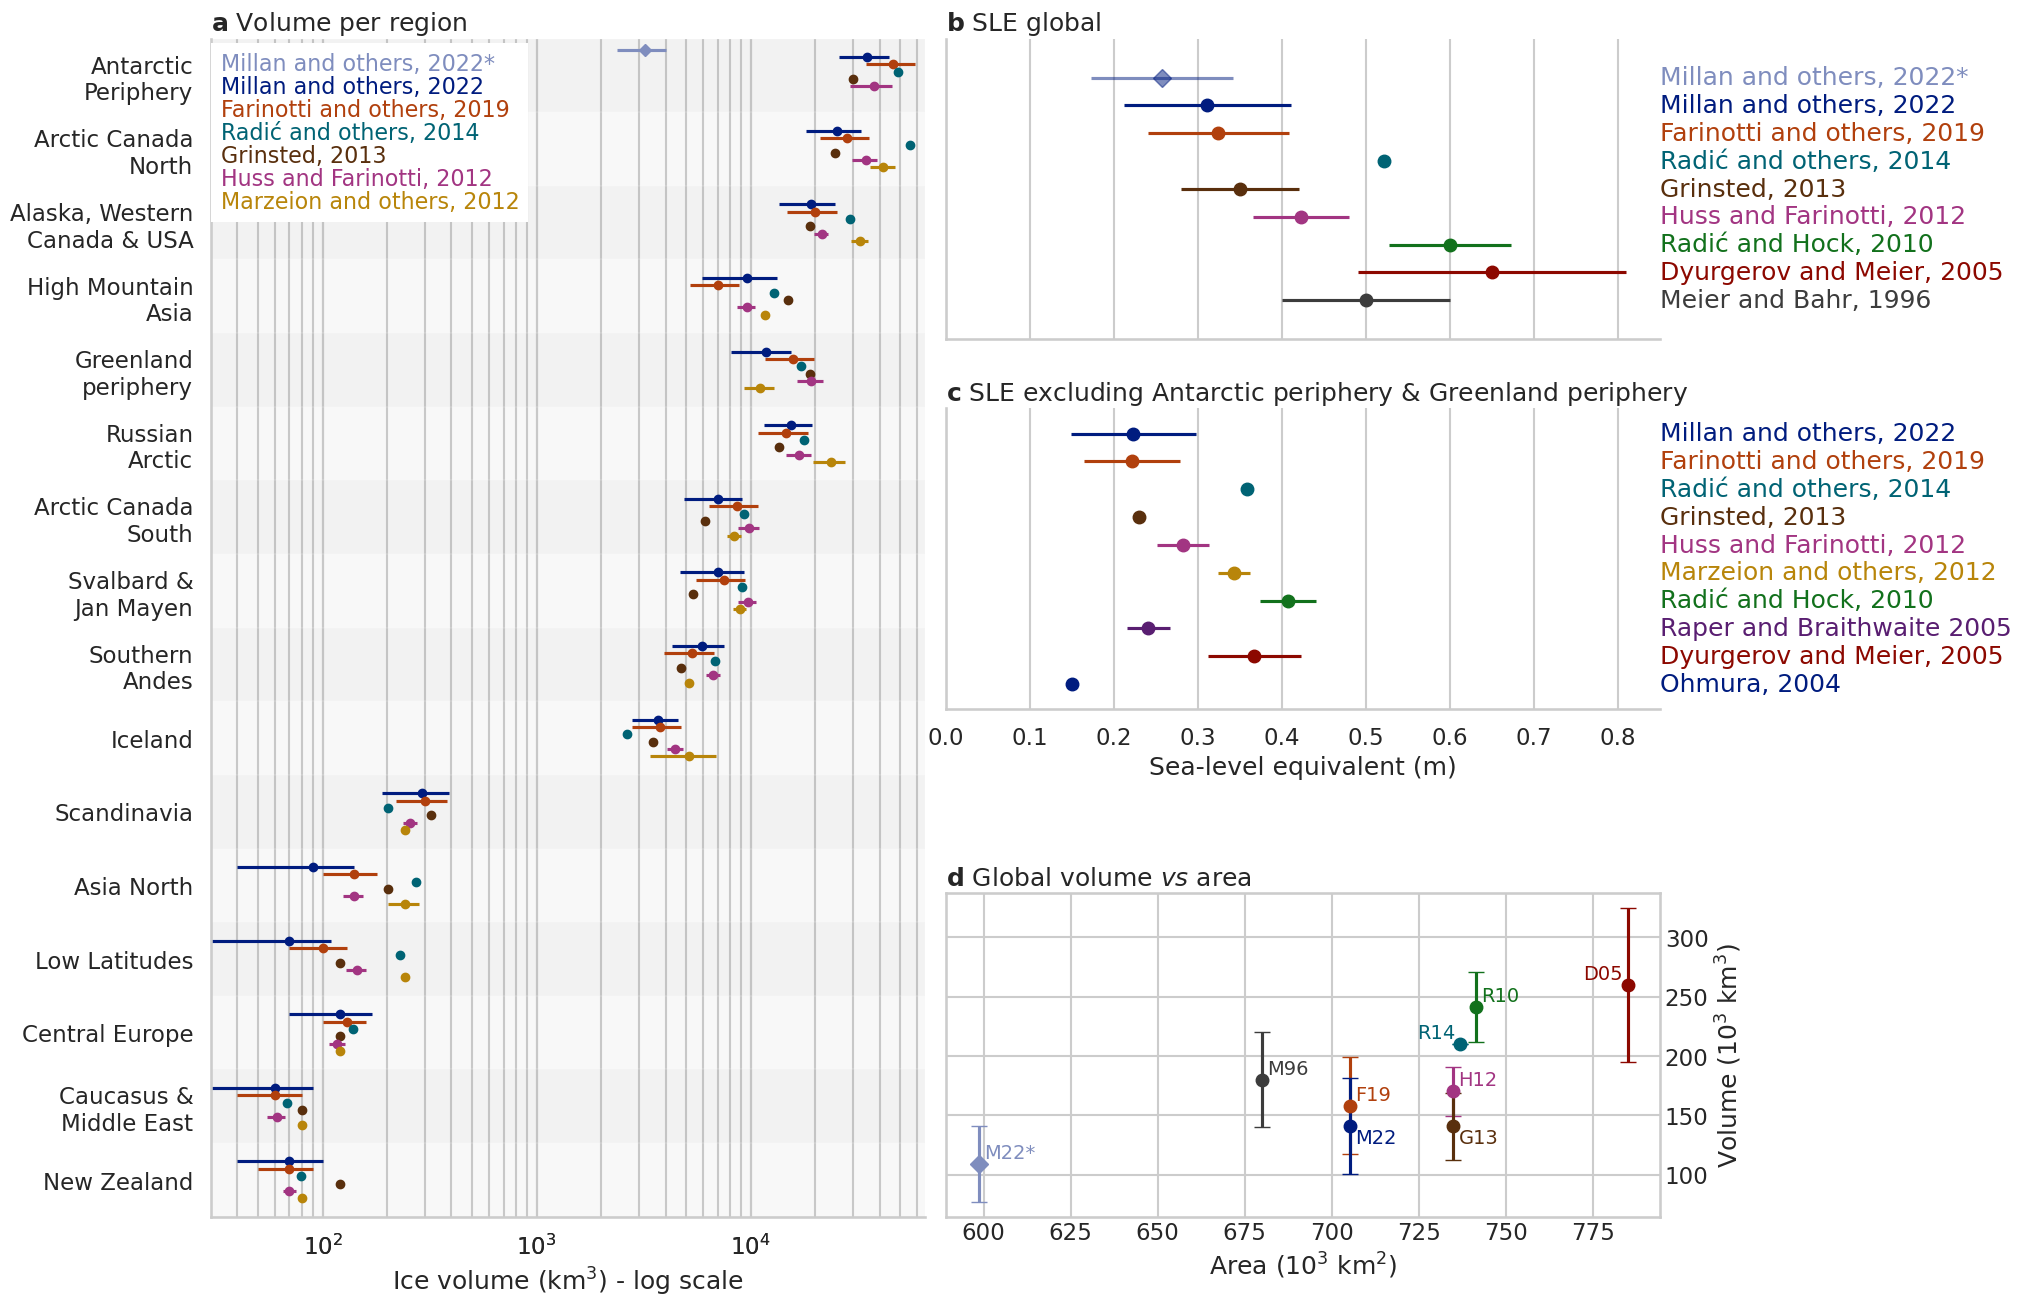

In [60]:
# Figure size
scale_factor = 0.85  # to control font size in PNG
f = plt.figure(figsize=(22 * scale_factor, 18 * scale_factor))

# Axis layout
gs = GridSpec(3, 2, wspace=0.03)
ax1 = f.add_subplot(gs[0, 1])
ax2 = f.add_subplot(gs[1, 1])
ax3 = f.add_subplot(gs[2, 1])
ax4 = f.add_subplot(gs[:, 0])
ax1.sharex(ax2)

# Prepare the rhs plot for y distance between estimates - we want the same for b and c
nm = len(sle_valid_keys_global) / 40  # +1 for additional millan
offset_global = np.linspace(-nm, nm, len(sle_valid_keys_global) + 1)
nm = (len(sle_valid_keys_no) - 1) / 40
offset_no = np.linspace(-nm, nm, len(sle_valid_keys_no))
xtext = 0.85  # where to put the rhs text

# Colors - we shuffle for prettier colors in the "important" estimates
p = sns.color_palette("dark", len(estimates))
random.Random(2).shuffle(p)
cmillan = '#7f8dbe'
mimarker = 'D'

# Parameters
y_range_rhs = 0.27  # Make sure both plots have same size despite different # of estimates
fs_rhs = 18
fs_lhs = 16

# Shift axis up right
yshift = 0.03

# ------------- Plot top right (b) -------------
ax = ax1

toplot = gdf_sle.iloc[[0]]
for i, e in enumerate(sle_valid_keys_global):

    estimate = e.split('_')[0]
    color = p[estimates.index(estimate)]

    err = toplot[f'{e}_err']
    if not np.isfinite(err.values[0]):
        err = None

    ax.errorbar(toplot[f'{e}'], offset_global[i], xerr=err, fmt='o', c=color);
    ax.text(xtext, offset_global[i], legend[estimate], c=color, va='center', fontsize=fs_rhs)

# Millan weird
ax.errorbar(257.2 * 1e-3, offset_global[i + 1], xerr=85 * 1e-3, fmt=mimarker, c=color, alpha=0.5);
ax.text(xtext, offset_global[i + 1], 'Millan and others, 2022*', c=cmillan, va='center', fontsize=fs_rhs)

# Axis cosmetics stuffs
ax.grid(axis='y')
ax.set_yticks([])
ax.set_ylim((-y_range_rhs, y_range_rhs))
sns.despine(ax=ax, bottom=False)
ax.set_title(r'$\bf{b}$ SLE global', loc='left')
plt.setp(ax1.get_xticklabels(), visible=False)


# Pos shenanigans
pos = ax.get_position()
pos.y0 += yshift;
ax.set_position(pos)


# ------------- Plot middle right (c) -------------
ax = ax2

toplot = gdf_sle.iloc[[1]]
for i, e in enumerate(sle_valid_keys_no):

    estimate = e.split('_')[0]
    color = p[estimates.index(estimate)]

    err = toplot[f'{e}_err']
    if not np.isfinite(err.values[0]):
        err = None

    ax.errorbar(toplot[f'{e}'], offset_no[i], xerr=err, fmt='o', c=color);
    ax.text(xtext, offset_no[i], legend[estimate], c=color, va='center', fontsize=fs_rhs)

# Axis cosmetics stuffs
ax.grid(axis='y')
ax.set_yticks([])
ax.set_xlim([0, 0.85]);
ax.set_ylim((-y_range_rhs, y_range_rhs))

# Pos shenanigans
pos = ax.get_position()
pos.y0 += yshift * 2; pos.y1 += yshift;
ax.set_position(pos)

ax.set_xlabel('Sea-level equivalent (m)')
ax.set_title(r'$\bf{c}$ SLE excluding Antarctic periphery & Greenland periphery', loc='left');
sns.despine(ax=ax)

# ------------- Plot bottom right (d) -------------
ax = ax3

for estimate in df_v.index:
    if estimate == 'm22*':
        c = cmillan
        fmt = mimarker
    else:
        c = p[estimates.index(estimate)]
        fmt = 'o'

    toplot = df_v.loc[[estimate]]
    ax.errorbar(toplot.A * 1e-3, toplot.V * 1e-3, yerr=toplot.V_err * 1e-3, fmt=fmt, color=c, capsize=6)

    # Text
    e = estimate.upper()
    if len(e) == 4 and '*' not in e:
        text = f'{e[0]}{e[2:]}'
    else:
        text = f'{e[0]}{e[1:]}'

    px, py = toplot.A * 1e-3 + 1.5, toplot.V * 1e-3 + 1.5
    ha = 'left'
    va = 'bottom'
    if e in ['R14', 'DM05']:
        px -= 3
        ha = 'right'
    if e in ['M22', 'G13']:
        py -= 3
        va = 'top'

    ax.text(px, py, text, color=c, ha=ha, va=va, fontsize=14);
ax.set_title(r'$\bf{d}$ Global volume $\it{vs}$ area', loc='left')
ax.set_xlabel('Area (10$^3$ km$^2$)'); ax.set_ylabel('Volume (10$^3$ km$^3$)');

ax.yaxis.tick_right()
ax.yaxis.set_label_position("right")
ax.tick_params(axis='both', which='both', length=0)

# Pos shenanigans
pos = ax.get_position()
pos.y1 -= yshift / 2;
ax.set_position(pos)


# ------------- Plot left (a) -------------
ax = ax4

# Index on the y-axis
rx = np.arange(len(m22))
# Space between estimates
offset = np.linspace(-0.25, 0.25, 6)

# Parameters
s = 6  # markersize
a = 0.4  # alpha for "less important" estimates

texts_for_legend = []

# Go over all esimates
for i, estimate in enumerate(['m22', 'f19', 'r14', 'g13', 'hf12', 'm12']):
    df = dataframes[estimate]
    if estimate == 'm12':
        # One reg less
        df = df.loc[rgi_ids[1:]]
        x = rx[1:] + offset[i]
    else:
        df = df.loc[rgi_ids]
        x = rx + offset[i]

    # alpha = 1 if i < 2 else a
    alpha = 1

    c = p[estimates.index(estimate)]
    ax.errorbar(df['V'], x, xerr=df['V_err'], fmt='o', c=c, markersize=s, alpha=alpha);
    texts_for_legend.append(TextArea(legend[estimate], textprops=dict(color=c, fontsize=fs_lhs, alpha=alpha)))

# Add Millan other
ax.errorbar(m22_a['V'], rx[0] - 0.35, xerr=m22_a['V_err'], fmt=mimarker, c=cmillan, markersize=s);
texts_for_legend.insert(0, TextArea('Millan and others, 2022*', textprops=dict(color=cmillan, fontsize=fs_lhs)))

# Legend box
texts_vbox = VPacker(children=texts_for_legend, pad=0, sep=0)
ann = AnnotationBbox(texts_vbox, (.223, .92), xycoords=ax.transAxes,
                     bboxprops=dict(color='none', facecolor='white'))
ann.set_figure(f)
f.artists.append(ann)

# Titles
ax.set_title(r'$\bf{a}$ Volume per region', loc='left');
ax.set_xlabel('Ice volume (km$^3$) - log scale');

# Axis cosmetics
ax.invert_yaxis()
ax.set_yticks(rx);
ax.set_yticklabels(strs);
sns.despine(ax=ax, right=True)
ax.grid(axis='y', which='both')
# All gridlines for log
ax.set_xscale('log')
xlocs = np.concatenate([np.arange(1, 11)[2:] * 1e1,
                        np.arange(1, 11) * 1e2,
                        np.arange(1, 11) * 1e3,
                        np.arange(1, 11)[:6] * 1e4])
ax.set_xticks(xlocs)
ax.set_xlim([30, 65000])

locs, labels = plt.yticks()

# Shading
for i, loc in enumerate(locs):
    alpha = 0.05 if i % 2 == 1 else 0.1
    ax.axhspan(loc - 0.5, loc + 0.5, facecolor='grey', alpha=alpha)
ax.set_ylim(15.5, -0.5)

# plt.tight_layout()
plt.savefig('../figures/plot_global_and_reg_log.pdf', dpi=150, bbox_inches='tight');
plt.savefig('../figures/plot_global_and_reg_log.png', dpi=150, bbox_inches='tight');

## Additional analyses 

### Other models in Farinotti 2019 

In [61]:
df_rgi = pd.read_hdf('../data/rgi6_stats.h5')
df_all = pd.read_hdf('../data/f19_icevol_pergla.hdf')

df_all['area'] = df_rgi['Area']
df_all['REG'] = [s[6:8] for s in df_all.index]

In [62]:
df_ref = df_rgi.groupby('O1Region').sum()[['Area']]

In [63]:
models = ['composite_vol_m3',
          'model_1_vol_m3',
          'model_2_vol_m3',
          'model_3_vol_m3',
          'model_4_vol_m3']

df_all_s = df_ref.copy()

for mo in models:

    dd_ = df_all[['REG', 'area', mo]].dropna()
    dd = dd_.groupby('REG').sum().replace(0, np.NaN) * 1e-9
    dd['area'] =  dd_.groupby('REG').sum().replace(0, np.NaN)['area']

    ratio = dd['area'].divide(df_ref['Area'])
    dd.loc[ratio < 0.98] = np.NaN

    df_all_s[mo] = dd[mo]

In [64]:
df_all_s.loc['01, 02'] = df_all_s.loc[['01', '02']].sum()
df_all_s.loc['13, 14, 15'] = df_all_s.loc[['13', '14', '15']].sum()
df_all_s = df_all_s.drop(['01', '02'] + ['13', '14', '15']).sort_index()
df_all_s.loc['13, 14, 15', 'model_4_vol_m3'] = np.NaN
df_all_s.loc['01, 02', 'model_2_vol_m3'] = np.NaN
df_all_s.loc['01, 02', 'model_4_vol_m3'] = np.NaN

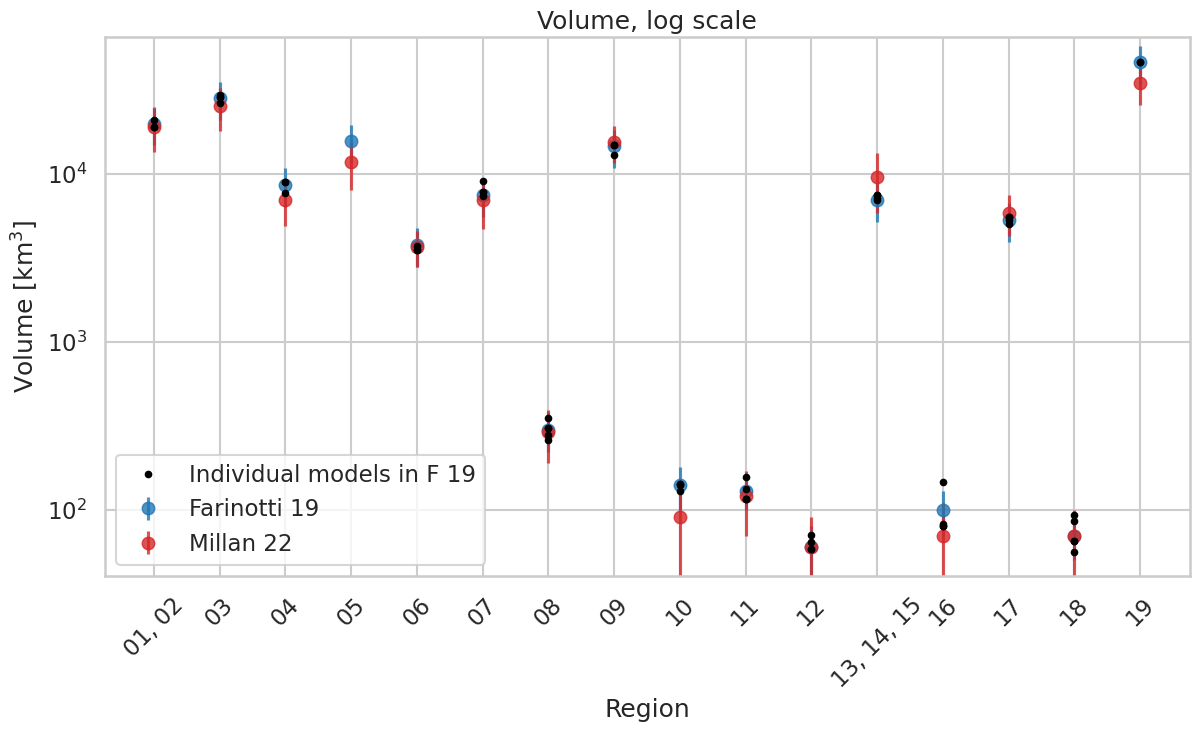

In [65]:
f, ax = plt.subplots(figsize=(14, 7))

reformat_df(f19).plot(ax=ax, y='V', yerr='V_err', marker='o', linestyle='none', alpha=0.8, c='C0');
m22.plot(ax=ax, y='V', yerr='V_err', marker='o', linestyle='none', alpha=0.8, c='C3');

plt.plot(df_all_s.model_1_vol_m3, '.', c='black', zorder=99)

ax.set_yscale('log')
plt.xticks(np.arange(len(m22.index)));
ax.set_xticklabels(m22.index, rotation=45);
plt.legend(['Individual models in F 19', 'Farinotti 19', 'Millan 22'], loc='lower left'); plt.xlabel('Region'); plt.ylabel('Volume [km$^3$]');

plt.plot(df_all_s.model_1_vol_m3, '.', c='black', zorder=99)
plt.plot(df_all_s.model_2_vol_m3, '.', c='black', zorder=99)
plt.plot(df_all_s.model_3_vol_m3, '.', c='black', zorder=99)
plt.plot(df_all_s.model_4_vol_m3, '.', c='black', zorder=99)

plt.title('Volume, log scale');